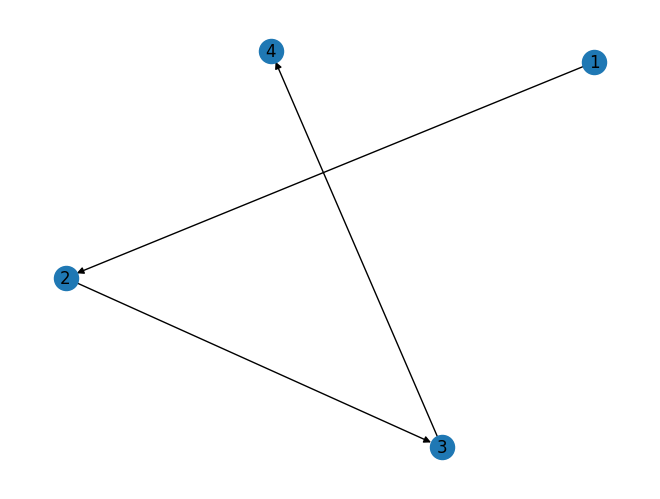

In [2]:
from raphtory import Graph
from raphtory import algorithms
from raphtory import Perspective
from raphtory import plot


g = Graph(4)
g.add_edge(1, 1, 2, {})
g.add_edge(1, 2, 3, {})
g.add_edge(1, 3, 4, {})

view = g.at(1)
plot.draw(view, with_labels=True)